# 10 Comparison `pois`, `footprints` and `geometries`

***17 July 2020***

Comparing the pois & footprints modules with a draft geometries module

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

## geometries

In [2]:
alresford_geometries = ox.gdf_from_point((51.0889,-1.1627),tags={'waterway':True, 'highway':True, 'natural':True, 'building':True}, dist=1000)
alresford_geometries.to_crs(epsg=27700, inplace=True)

## pois

In [3]:
alresford_pois = ox.pois_from_point((51.0889,-1.1627),tags={'waterway':True, 'highway':True, 'natural':True, 'building':True}, dist=1000)
alresford_pois.to_crs(epsg=27700, inplace=True)

## footprints

In [4]:
alresford_footprints_building = ox.footprints_from_point((51.0889,-1.1627),footprint_type='building', dist=1000)
alresford_footprints_highway = ox.footprints_from_point((51.0889,-1.1627),footprint_type='highway', dist=1000, retain_invalid=True)
alresford_footprints_natural = ox.footprints_from_point((51.0889,-1.1627),footprint_type='natural', dist=1000, retain_invalid=True)
alresford_footprints_waterway = ox.footprints_from_point((51.0889,-1.1627),footprint_type='waterway', dist=1000, retain_invalid=True)
alresford_footprints_building.to_crs(epsg=27700, inplace=True)
alresford_footprints_highway.to_crs(epsg=27700, inplace=True)
alresford_footprints_natural.to_crs(epsg=27700, inplace=True)
alresford_footprints_waterway.to_crs(epsg=27700, inplace=True)

## plot

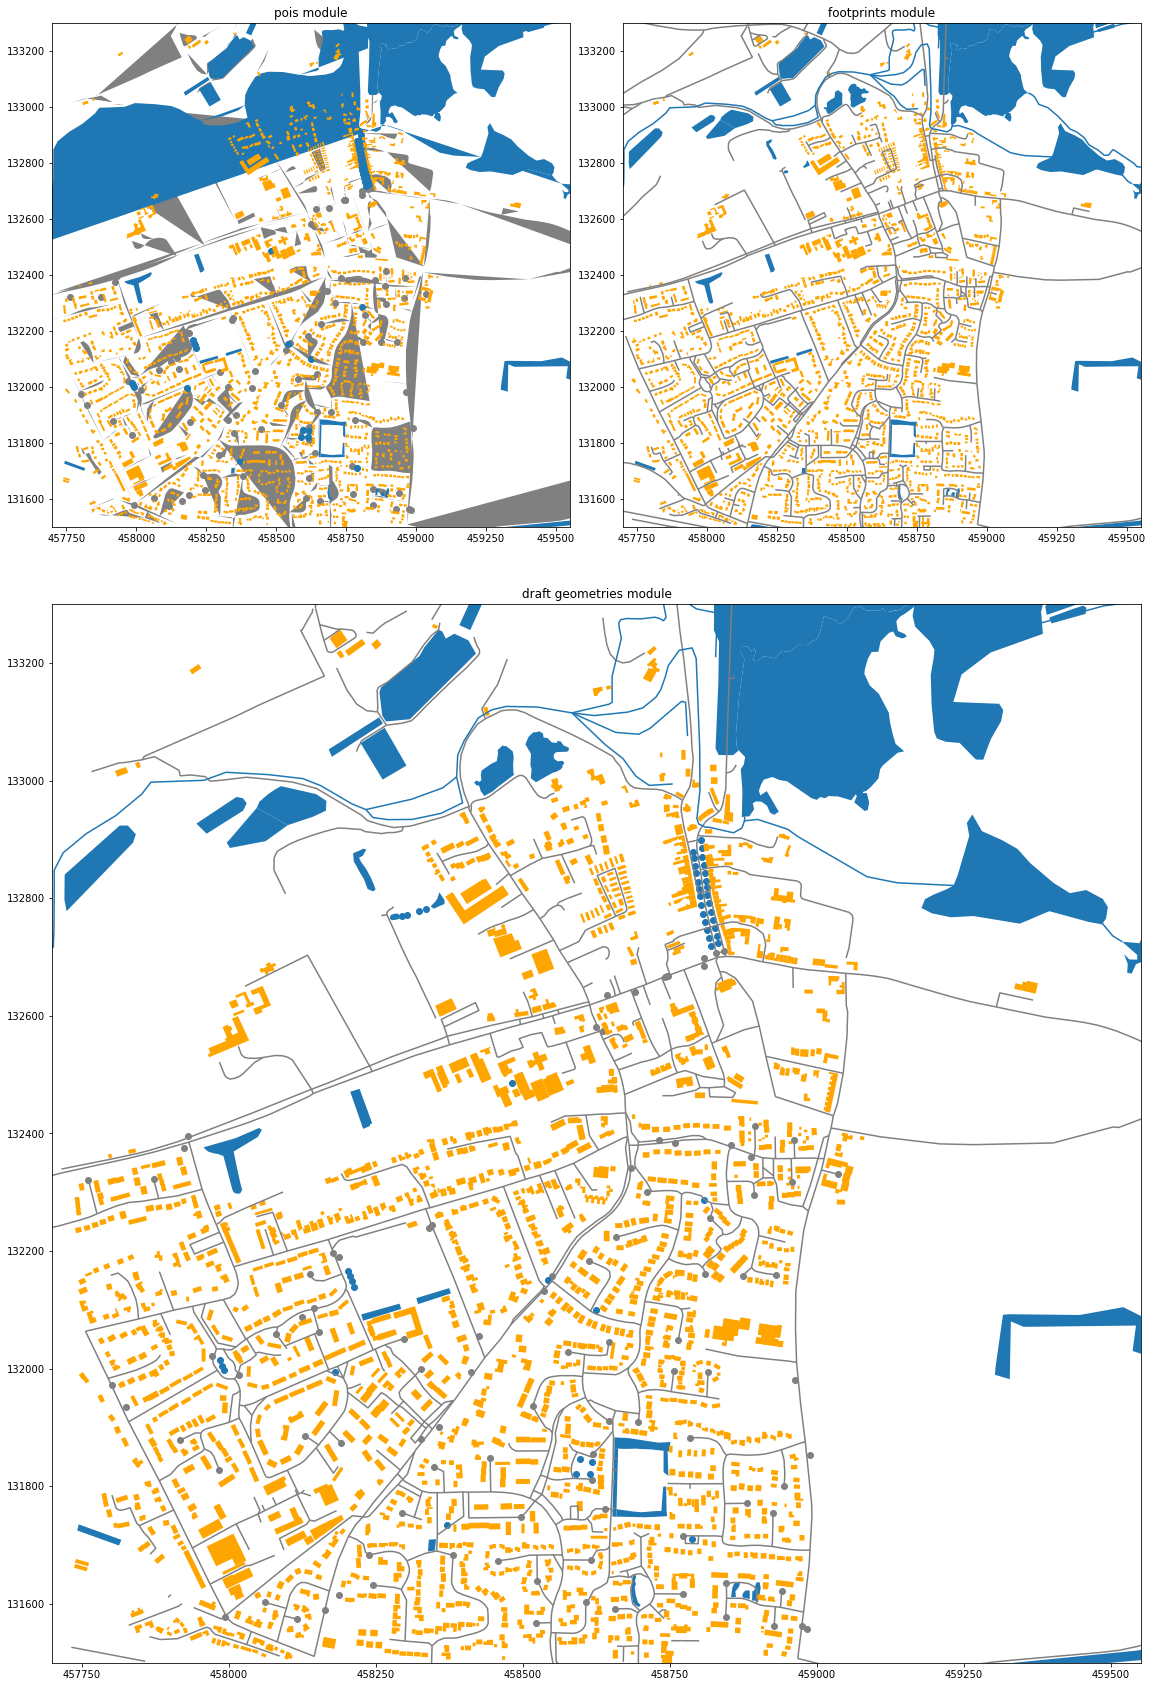

In [5]:
fig3 = plt.figure(figsize=(16,24))
gs = fig3.add_gridspec(3, 2)

ax0 = fig3.add_subplot(gs[0, 0])
alresford_pois[alresford_pois['highway'].notna()].plot(ax=ax0, color='grey')
alresford_pois[alresford_pois['waterway'].notna()].plot(ax=ax0)
alresford_pois[alresford_pois['natural'].notna()].plot(ax=ax0)
alresford_pois[alresford_pois['building'].notna()].plot(ax=ax0, color='orange')
ax0.set_xlim(left=457700, right=459550)
ax0.set_ylim(top=133300, bottom=131500)
ax0.set_title("pois module")

ax1 = fig3.add_subplot(gs[0, 1])
alresford_footprints_highway.plot(ax=ax1, color='grey')
alresford_footprints_waterway.plot(ax=ax1)
alresford_footprints_natural.plot(ax=ax1)
alresford_footprints_building.plot(ax=ax1, color='orange')
ax1.set_xlim(left=457700, right=459550)
ax1.set_ylim(top=133300, bottom=131500)
ax1.set_title("footprints module")

ax2 = fig3.add_subplot(gs[1:, :])
alresford_geometries[alresford_geometries['highway'].notna()].plot(ax=ax2, color='grey')
alresford_geometries[alresford_geometries['waterway'].notna()].plot(ax=ax2)
alresford_geometries[alresford_geometries['natural'].notna()].plot(ax=ax2)
alresford_geometries[alresford_geometries['building'].notna()].plot(ax=ax2, color='orange')
ax2.set_xlim(left=457700, right=459550)
ax2.set_ylim(top=133300, bottom=131500)
ax2.set_title("draft geometries module")

fig3.tight_layout()

fig3.savefig("pois_footprints_geometries_comparison.png", dpi=72)

### Notes

The `pois` module returns:

- Tagged nodes as points
- Every OSM way that it can converted to a polygon
- Any multipolygons that it can create from those polygons

The `footprints` module returns:

- Closed OSM ways converted to polygons
- Multipolygons assembled from component open and closed OSM ways
- Open OSM ways that it would otherwise discard as linestrings (If retain_invalid=True)

The draft `geometries` module returns:

- Tagged nodes as points
- Open ways as linestrings
- Closed ways as linestrings/polygons
- Multipolygon relations as multipolygons.